In [19]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41, hypercube= False, class_sep=20)

In [20]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


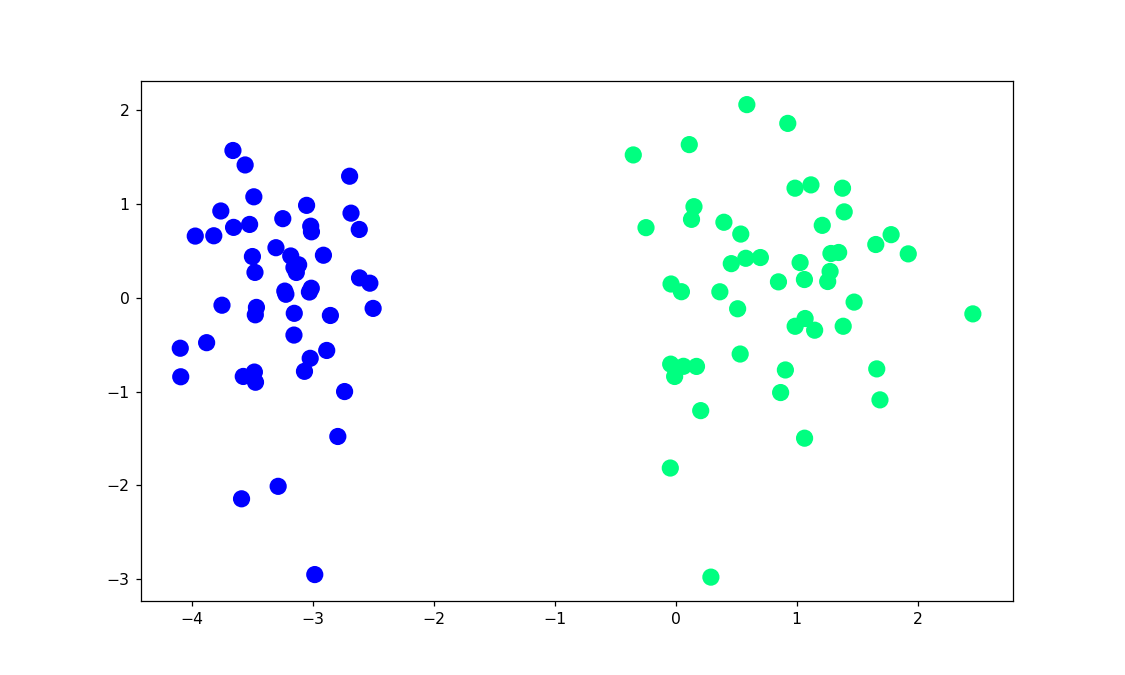

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter', s=100)

In [22]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.2
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]

In [23]:
def step(z):
    return 1 if z>0 else 0

In [24]:
intercept_,coef_ = perceptron(X,y)

In [25]:
print(coef_)
print(intercept_)

[0.98171069 0.27334424]
1.4


In [26]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [27]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+b

<IPython.core.display.Javascript object>


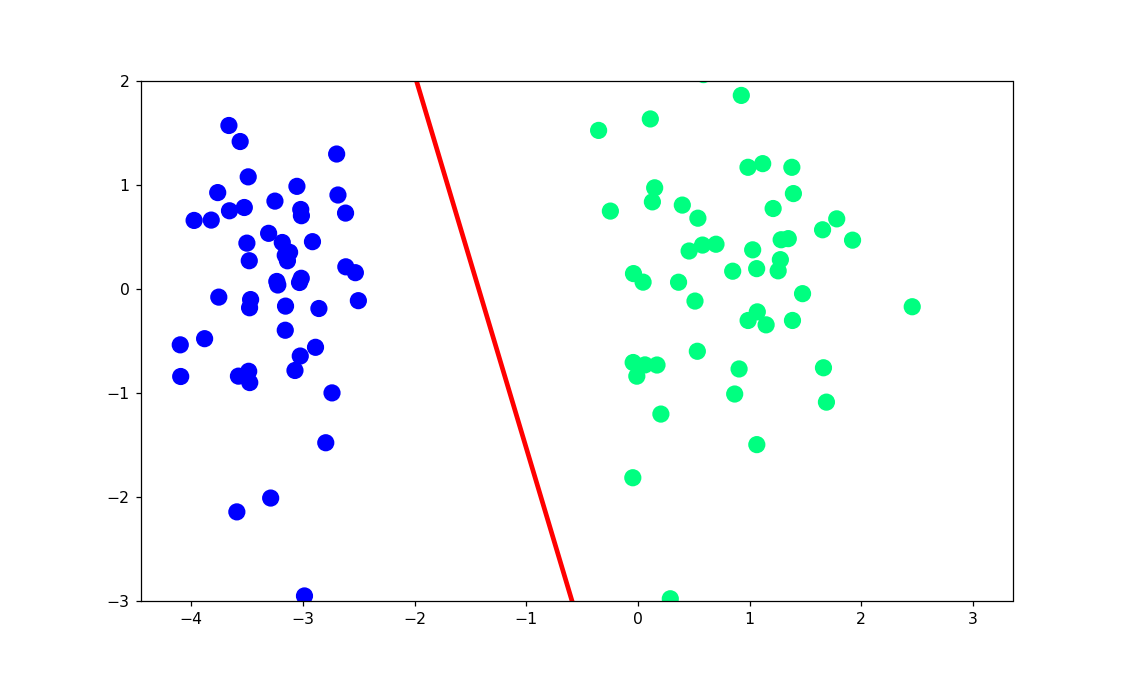

(-3.0, 2.0)

In [28]:
plt.figure(figsize=(10,6))




plt.plot(x_input,y_input, color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [29]:
def perceptron(X,y):
    m=[]
    b=[]
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.2
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

In [30]:
m,b = perceptron(X,y)

In [31]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


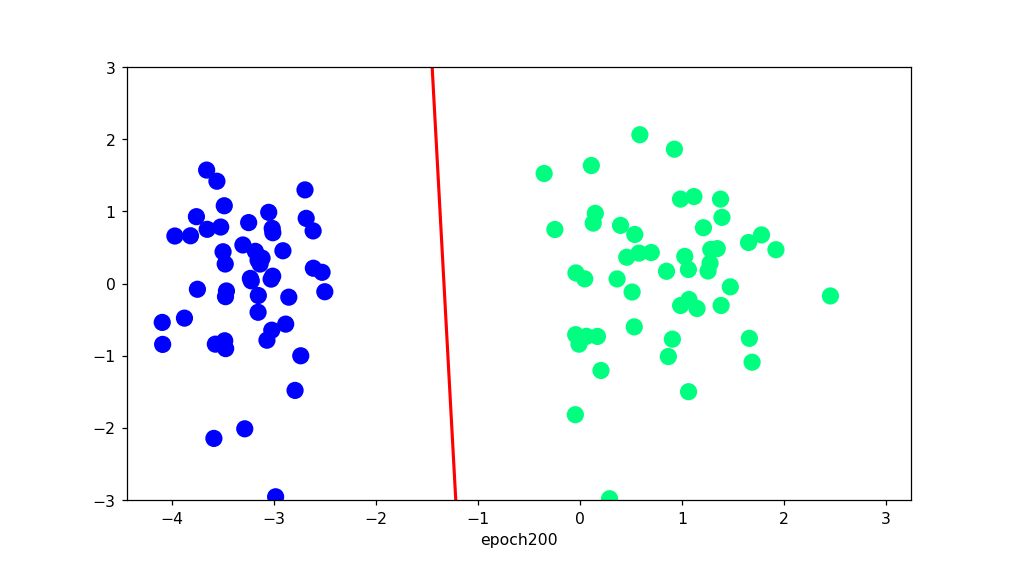

In [32]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0]+b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i,x_i*m[0]+b[0],'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch{0}'.format(i+1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)
anim = FuncAnimation(fig, update, repeat=False, frames=200, interval=100)

Logistic Regression using Gradient Descent

In [33]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none', solver='sag')
lor.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [34]:
print(lor.coef_)
print(lor.intercept_)

[[4.80614747 0.21193116]]
[5.78141839]


In [36]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1=-(lor.intercept_/lor.coef_[0][1])

In [38]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input+b1

In [42]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.5
    
    for i in range(2500):  #Epoch Value =2500
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights+lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [43]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [44]:
coef_, intercept_=gd(X,y)

In [45]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [46]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

<IPython.core.display.Javascript object>


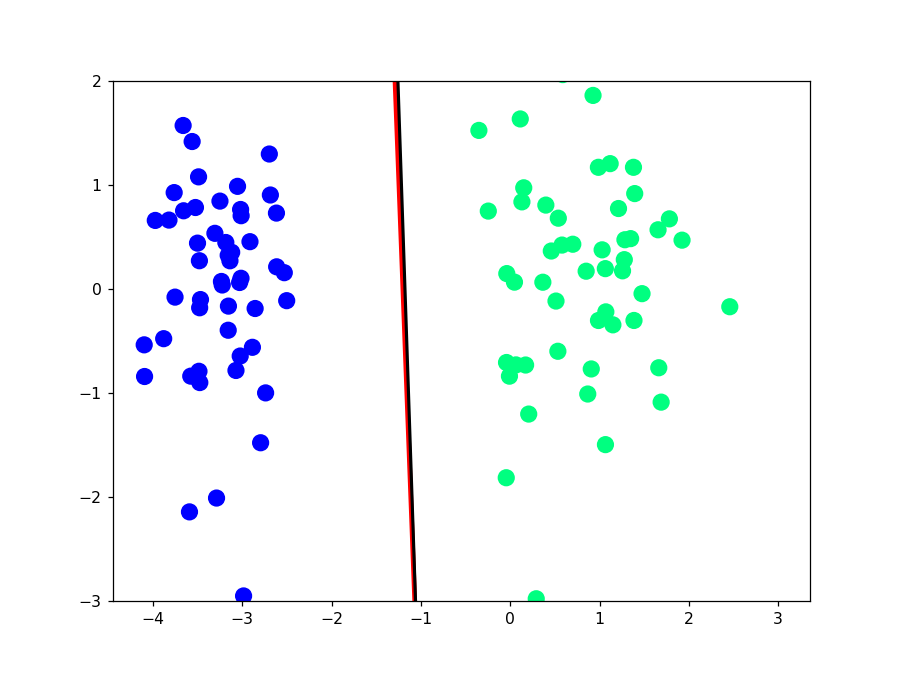

(-3.0, 2.0)

In [49]:
plt.figure(figsize=(8,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1, color='black', linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)